# Fashion-MNIST

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from aggmap import AggMap


In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #load data

In [20]:
_, w, h = x_train.shape
orignal_cols = ['p-%s' % str((i+1)).zfill(len(str(w*h))) for i in range(w*h)]
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], w*h), columns=orignal_cols)
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], w*h), columns=orignal_cols)

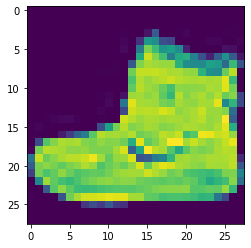

In [21]:
ax = plt.imshow(x_train_df.iloc[0].values.reshape(w,h))

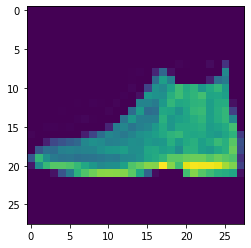

In [22]:
ax = plt.imshow(x_test_df.iloc[0].values.reshape(w,h))

## Step1: MNIST pixel random permutation

In [23]:
shuffled_cols = shuffle(orignal_cols, random_state=111)
x_train_df_shuffled = x_train_df[shuffled_cols]
x_test_df_shuffled = x_test_df[shuffled_cols]

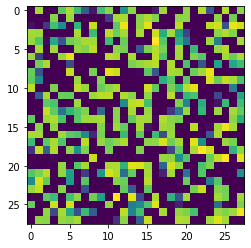

In [24]:
ax = plt.imshow(x_train_df_shuffled.iloc[0].values.reshape(w,h))

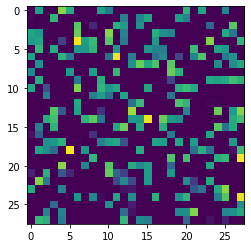

In [25]:
ax = plt.imshow(x_test_df_shuffled.iloc[0].values.reshape(w,h))

## Step2: AggMap pre-fitting on training set

In [26]:
mp = AggMap(x_train_df_shuffled, metric='correlation')
mp = mp.fit(cluster_channels=1, var_thr=0, verbose=0, densmap=True) 


                                                 
  0%|          | 21/60000 [03:49<5:49:29,  2.86it/s]
                                                 
  0%|          | 21/60000 [03:49<5:49:29,  2.86it/s]

2021-11-10 11:23:08,059 - INFO - [bidd-aggmap] - Calculating distance ...
2021-11-10 11:23:08,096 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 784/784 [00:01<00:00, 406.46it/s]

                                                 
  0%|          | 21/60000 [04:56<5:49:29,  2.86it/s]/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


2021-11-10 11:24:14,519 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...



                                                 
  0%|          | 21/60000 [04:59<5:49:29,  2.86it/s]

2021-11-10 11:24:18,224 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)



                                                 
  0%|          | 21/60000 [05:00<5:49:29,  2.86it/s]

2021-11-10 11:24:18,895 - INFO - [bidd-aggmap] - Finished


## Step3: AggMap transformation on training and test test

In [27]:
x_train_restructured = mp.batch_transform(x_train_df_shuffled.values[:10])
x_test_restructured = mp.batch_transform(x_test_df_shuffled.values[:10])

100%|##########| 10/10 [00:01<00:00,  5.23it/s]


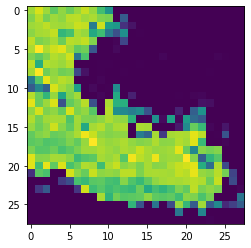

In [28]:
ax = plt.imshow(x_train_restructured[0].reshape(*mp.fmap_shape))

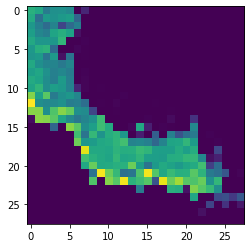

In [29]:
ax = plt.imshow(x_test_restructured[0].reshape(*mp.fmap_shape))

In [ ]:
UMAP()

In [18]:
from umap import UMAP

In [58]:
mp = mp.fit(cluster_channels=1, var_thr=0.5, verbose=0, densmap=True, #force_approximation_algorithm=True,
            dens_lambda=1.0,
            dens_frac=0.9,
            dens_var_shift=0.5, ) 


                                                 
  0%|          | 21/60000 [14:20<5:49:29,  2.86it/s]/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


2021-11-10 11:33:38,441 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...



                                                 
  0%|          | 21/60000 [14:24<5:49:29,  2.86it/s]

2021-11-10 11:33:42,743 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)



                                                 
  0%|          | 21/60000 [14:25<5:49:29,  2.86it/s]

2021-11-10 11:33:43,351 - INFO - [bidd-aggmap] - Finished


In [59]:
mp.plot_scatter(radius=5)


                                                 
  0%|          | 21/60000 [14:25<5:49:29,  2.86it/s]
                                                 
  0%|          | 21/60000 [14:25<5:49:29,  2.86it/s]

2021-11-10 11:33:43,371 - INFO - [bidd-aggmap] - generate file: ./feature points_781_correlation_umap_scatter
2021-11-10 11:33:43,386 - INFO - [bidd-aggmap] - save html file to ./feature points_781_correlation_umap_scatter


In [60]:
x_train_restructured = mp.batch_transform(x_train_df_shuffled.values[:10])
x_test_restructured = mp.batch_transform(x_test_df_shuffled.values[:10])

100%|##########| 10/10 [00:01<00:00,  5.29it/s]


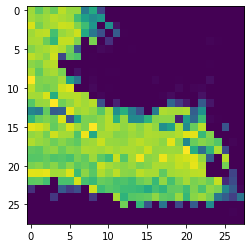

In [61]:
ax = plt.imshow(x_train_restructured[0].reshape(*mp.fmap_shape))

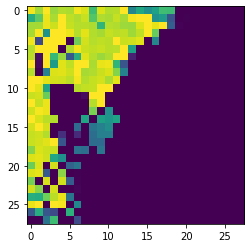

In [76]:
ax = plt.imshow(x_test_restructured[2].reshape(*mp.fmap_shape))

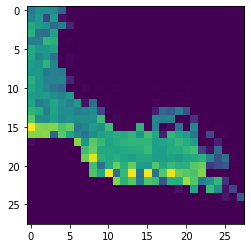

In [62]:
ax = plt.imshow(x_test_restructured[0].reshape(*mp.fmap_shape))